# Mergin Tables with Pandas
This lesson is intended to give you a quick introduction to merging tables. In upcoming lectures, we will revisit many of these concepts using SQL instead of Pandas.

For a full description of the ```merge``` method see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

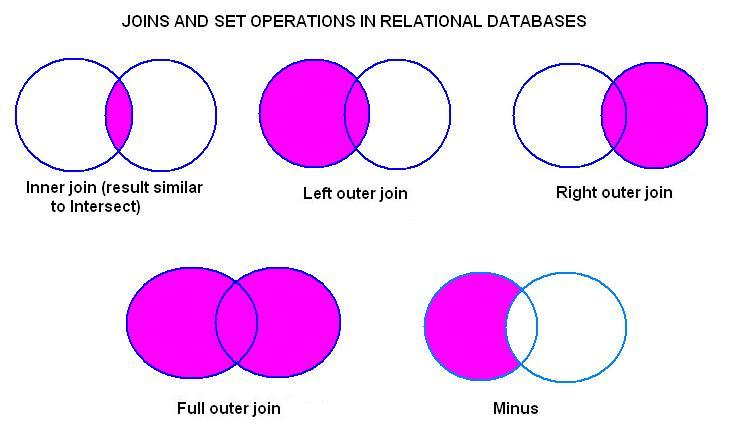

Source: https://www1.udel.edu/evelyn/SQL-Class2/SQLclass2_Join.html

### First display the two tables 

In [4]:
import os
os.getcwd()

'/Users/cagilalbayrak/LAS792'

In [7]:
import pandas as pd
import pprint

#LAS792 folder
dataFolder = '/Users/cagilalbayrak/LAS792/'

Ages = pd.read_csv(dataFolder+"Ages.csv")
print("Ages")
pprint.pprint(Ages)

Heights = pd.read_csv(dataFolder+"Heights.csv")
print("\nHeights")
pprint.pprint(Heights)

Ages
    name  age
0   Bill   19
1   Mary   25
2  Larry   65

Heights
   name  height
0  Bill    73.0
1  Mary    65.0
2  Fred     NaN
3  Bill    73.0


### A FULL Cartesian (Outer) join
A FULL Cartesian join returns all possible combinations of a row from one table with all rows on the other table.
In the example tables, ages has three rows and heights has four, so **TWELVE** rows are returned. With Pandas, the option you would use is ```cross```

In [8]:
#syntax 1
Ages.merge(Heights,
         how='cross')

,name_x,age,name_y,height
0,Bill,19,Bill,73.0
1,Bill,19,Mary,65.0
2,Bill,19,Fred,NaN
3,Bill,19,Bill,73.0
4,Mary,25,Bill,73.0
5,Mary,25,Mary,65.0
6,Mary,25,Fred,NaN
7,Mary,25,Bill,73.0
8,Larry,65,Bill,73.0
9,Larry,65,Mary,65.0


In [9]:
#syntax 2
pd.merge(Ages,Heights,
         how='cross')

,name_x,age,name_y,height
0,Bill,19,Bill,73.0
1,Bill,19,Mary,65.0
2,Bill,19,Fred,NaN
3,Bill,19,Bill,73.0
4,Mary,25,Bill,73.0
5,Mary,25,Mary,65.0
6,Mary,25,Fred,NaN
7,Mary,25,Bill,73.0
8,Larry,65,Bill,73.0
9,Larry,65,Mary,65.0


In [10]:
#Specifying the suffixes
pd.merge(Ages,Heights,
         how='cross',
         suffixes=('_A', '_H'))

,name_A,age,name_H,height
0,Bill,19,Bill,73.0
1,Bill,19,Mary,65.0
2,Bill,19,Fred,NaN
3,Bill,19,Bill,73.0
4,Mary,25,Bill,73.0
5,Mary,25,Mary,65.0
6,Mary,25,Fred,NaN
7,Mary,25,Bill,73.0
8,Larry,65,Bill,73.0
9,Larry,65,Mary,65.0


### A LEFT join
Here we must specify the column(s) we'll be matching on. If the matching column(s) have the same name (and type) on both tables, we can just specify them using the ```on``` option. We could pass the name of one column (```on='name'```) or a list of columns to merge on. 

A LEFT join returns the table on the left (i.e. the leftmost table in the ```merge``` statement) and adds variables from the RIGHT table *for matching rows*. With Pandas, the option you would use is ```left```. 

Note that in this case adding the ```suffixes``` option does nothing.

In [ ]:
#merge merge 1:m using Heights (this is what we are adding), keep(match master) for STATA
#joinby

In [11]:
pd.merge(Ages,Heights,
         left_on='name',
         right_on='name', 
         how='left',
        suffixes=('_A', '_H'))

,name,age,height
0,Bill,19,73.0
1,Bill,19,73.0
2,Mary,25,65.0
3,Larry,65,NaN


In [ ]:
pd.merge(Ages,Heights,
         how='left',
         on={'name'})

If the matching columns had different names, we could specify them separately with ```left_on``` and ```right_on```. Note that here, since the Ages2 table has a 'name' column (a column that has the same name of a column on Heights, but that is not used for matching), the suffix is necessary to specify which 'name' column we're talking about. 

In [ ]:
#First I create a copy of Ages and add a new column called 'names2' that is identical to 'names'
Ages2 = Ages.copy()
Ages2['name2'] = Ages2['name']

#merge them
Ages2.merge(Heights,
         left_on='name2',
         right_on='name', 
         how='left',
         suffixes=('_A', '_H'))

### BEST PRACTICE
Specify the columns in each table  on which to join.  That way there can be no misunderstandings.

### A RIGHT join
This one works similarly to a LEFT join, but it keeps rows from the table on the RIGHT.

In [ ]:
Ages.merge(Heights,
         left_on='name',
         right_on='name', 
         how='right')

#### Without duplicates

In [ ]:
pd.merge(Ages,Heights.drop_duplicates(),
        left_on='name',
        right_on='name', 
         how='right')

## Inner joins
Often one wants only information where a key matches in the joined tables.

In [ ]:
Ages.merge(Heights,
         left_on='name',
         right_on='name', 
         how='inner')

In [ ]:
pd.merge(Ages,Heights,
        left_on='name',
        right_on='name')

## Merging on Indices
Pandas can also use the index to merge the tables. Note that you should be careful because you might end up merging based on the order of the rows when they were first read. If this order changes the next time you run your code, the merge might be different.

In [13]:
pprint.pprint(Ages)
print(Heights)

    name  age
0   Bill   19
1   Mary   25
2  Larry   65
   name  height
0  Bill    73.0
1  Mary    65.0
2  Fred     NaN
3  Bill    73.0


In [ ]:
Ages.merge(Heights,
         left_index=True,
         right_index=True, 
         how='inner') #how='left' deseydin kotu oluyor bak.


That's terrible! The index is not necessarily going to be the correct criterion to use for matching. We would prefer to be able to choose the dimensions we're merging on. One option is to 

In [14]:
Ages.set_index('name', drop=False) #burda drop kullanmayi unutma.

,name,age
name,,
Bill,Bill,19
Mary,Mary,25
Larry,Larry,65


In [ ]:
Ages.set_index('name',drop=False).merge(Heights.set_index('name',drop=False),
         left_index=True,
         right_index=True, 
         how='left')

If we don't want the 'name' column repeated, we could remove the option ```drop=False``` when we set index of one table (but not for both)

In [ ]:
Ages.set_index('name',drop=False).merge(Heights.set_index('name'),
         left_index=True,
         right_index=True, 
         how='left')

In [ ]:
print('all done')